In [1]:
import os
import sys
root_path = os.path.abspath("../../../")
if root_path not in sys.path:
    sys.path.append(root_path)
    
from Util.Util import DataUtil

train_num = 6000
(x_train, y_train), (x_test, y_test) = DataUtil.get_dataset(
    "mushroom", "../../../_Data/mushroom.txt",
    n_train=train_num, tar_idx=0
)
x_train, y_train, wc, features, feat_dicts, label_dict = DataUtil.quantize_data(x_train, y_train)
x_test, y_test = DataUtil.transform_data(x_test, y_test, wc, feat_dicts, label_dict)

from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
x_train = enc.fit_transform(x_train).toarray()
x_test = enc.transform(x_test).toarray()

In [2]:
from Toolbox import NB2NN

nn = NB2NN().fit(x_train, y_train, x_test, y_test, snapshot_ratio=0)

Naive Bayes performance
------------------------------------------------------------
acc  -  Train : 0.955167   CV :  0.95339
------------------------------------------------------------
Initial performance
------------------------------------------------------------
acc  -  Train : 0.955167   CV :  0.95339   Test : None
------------------------------------------------------------
Epoch    0   Iter        0   Snapshot      0 (acc)  -  Train :     0.96   Test :  0.95339
Epoch   32   Iter     1472   Snapshot     32 (acc)  -  Train :      1.0   Test : 0.998117  -  Time Cost: 2.5686230659484863


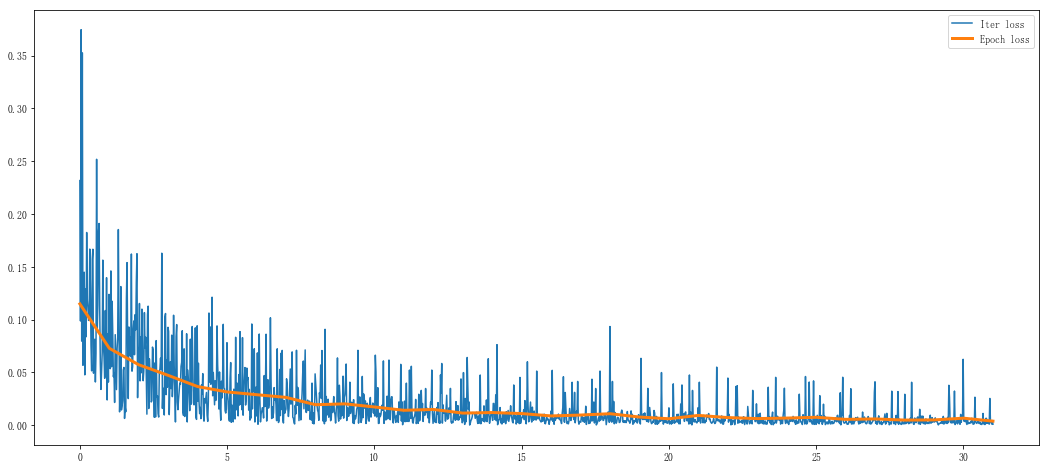

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (18, 8)

el, il = nn.log["epoch_loss"], nn.log["iter_loss"]
ee_base = np.arange(len(el))
ie_base = np.linspace(0, len(el) - 1, len(il))
plt.figure()
plt.plot(ie_base, il, label="Iter loss")
plt.plot(ee_base, el, linewidth=3, label="Epoch loss")
plt.legend()
plt.show()